# Pymaceuticals Inc.
---

### Analysis

- There are 3 drug regimens in which the Tumor statistics (mean, median, standard deviation, variance and sem) are above that of the placebo volumes (mm3).
These 3 regimens are Ketapril, Naftisol, and Stelasyn.  In looking at the mice within these test regimens; for every time point that the mouse was tracked in the study, the tumor volume grew over time... ie it never shrunk.  Over the course of the trial the mice count in each of these studies was ~50% of the mouse count at the start of the study.
In terms of analyzing the effect of the drug treatment on the mice in the regimen, I would want to understand what happened to the mice (ie did they die, was the tumor cured... and how their weigt changed relative to the growth in tumor volume)

- The 2 drug regimen which had the lowest summary statistics (across all comparison points) were Capomulin and Ramicane. These treatments also had the smallest change in number of mice included in the results over time.. which suggests that the drug may have been successful in slowing the tumor growth or death.  
For the mice included in these two regimen, the tumor volume shrunk over time for each mouse in the test groups

- In general it appears that the heavier the mouse the less effective the drug regimen is.  This analysis is drawn from the scatter plot, and the correlation coeficient.  It would be interesting to know if the larger mice received more of the drug or if each mouse received the same amount of the drug... and how the efficacy of the drug changed if dosing varied based on mouse weight 

In [1]:
# import necessary dependencies for analysis
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# create variables for csv files to read into notebook
mousedata = 'data/Mouse_metadata.csv'
studyresults = 'data/Study_results.csv'

In [3]:
# load mouse metadata to pandas and preview DataFrame
df_mouse_data = pd.read_csv(mousedata)

# preview DataFrame
df_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# display datatypes
df_mouse_data.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [5]:
# display record count for Mouse DataFrame
len(df_mouse_data["Mouse ID"])

249

In [6]:
# load study results to pandas and preview DataFrame
df_results = pd.read_csv(studyresults)

# preview DataFrame
df_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# count number of records in results DataFrame
len(df_results.index)

1893

In [8]:
# display datatypes for result table
df_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [9]:
# create combined DataFrame (df_mouse_data should be driving table)
df_combined = pd.merge(df_results, df_mouse_data, how = "left", on = "Mouse ID")
df_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# check the number of mice within the combined dataframe
count_mice = df_combined["Mouse ID"].value_counts()
number_mice = len(count_mice)
number_mice

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df_combined[df_combined.duplicated(["Mouse ID", "Timepoint"])]
duplicate_ID = duplicate_mouse["Mouse ID"].unique()

# display duplicate MouseID
print(f" The duplicate mouse ID, when examining Mouse ID and Timepoint columns is {duplicate_ID}.")

 The duplicate mouse ID, when examining Mouse ID and Timepoint columns is ['g989'].


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_records = df_combined.loc[df_combined["Mouse ID"] == 'g989',:]
duplicate_mouse_records

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# to keep 1st instance of duplicate record based on mouse id and timepoint

# duplicate_mouse_records.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep= "first")

In [14]:
# create new dataframe excluding duplicate mouse ID (vs. keeping initial instance)
# can drop duplicate record from original dataframe by using the drop duplicates(subset = )

df_clean = pd.DataFrame(df_combined.loc[df_combined["Mouse ID"] != 'g989',:])
df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the clean DataFrame.
count_mice = df_clean["Mouse ID"].unique()
number_mice = len(count_mice)
number_mice

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Summary Statistics - Mean
mean = df_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# Summary Statistics - Median
median = df_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# Summary Statistics - Variance
variance = df_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# Summary Statistics - standard deviation
std = df_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Summary Statistics - standard error of mean
sem = df_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

by_regimen_df = pd.DataFrame({"Mean Tumor Vol": mean, "Median Tumor Vol": median, "Variance Tumor Vol": variance,
                             "Std. Tumor Vol": std, "Standard Error of Mean": sem})

# Format DataFrame
by_regimen_df.index.name = None

by_regimen_df

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Std. Tumor Vol,Standard Error of Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
summary_table = df_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var', 'std','sem']})

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

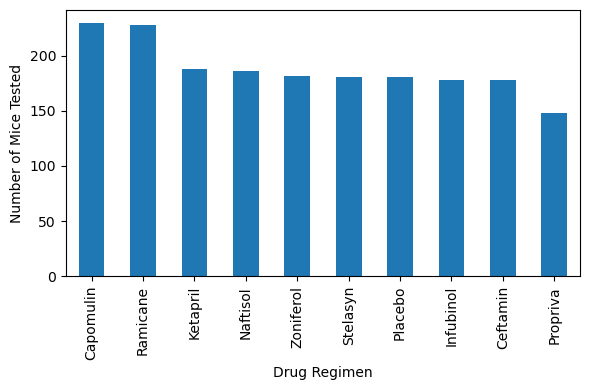

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# generate series that counts number of times each drug regimen was reported on (across all mice)
instances = df_clean["Drug Regimen"].value_counts()
instances = instances.sort_values(ascending = False)

# create new simplified dataframe with number of treatment points for each treatment
df_treatmentcount = pd.DataFrame({"# of timepoints": instances})

# create a bar plot showing # of incidents associated with each treatment
PandasBarchart = df_treatmentcount["# of timepoints"].plot.bar(figsize = (6,4))

# add axis labels and chart title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# display plot
plt.tight_layout()
plt.show()

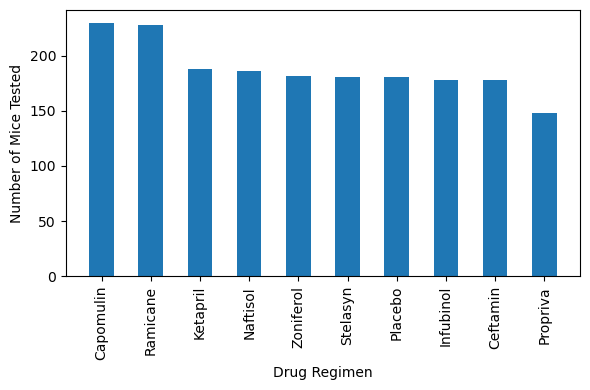

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# use the value stored in instances for # of mice tested for each drug regimen
instances

# set the x-axis to the length of the 'count' in the "insances" series
x_axis = np.arange(len(instances))

# create a bar plot, set figure size
plt.figure(figsize = (6,4))

# generate bar plot using length of the instances series
plt.bar(x_axis, instances, width = 0.5)

# create tick marks for each item in x_axis, assign value to tick mark based on index in series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, instances.index)

# rotate lables for visibility
plt.xticks(rotation = 90)

# add labels to axis
plt.xlabel ("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# display plot
plt.tight_layout()
plt.show()

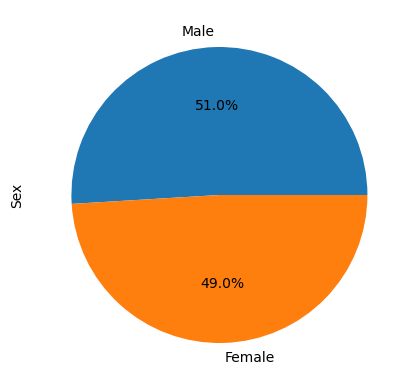

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendermix = df_clean["Sex"].value_counts()

# create new simplified dataframe with number of treatment points for each treatment
df_gendersplit = pd.DataFrame({"# by sex": gendermix})
df_gendersplit

# create a bar plot showing # of incidents associated with each treatment
PandasPieChart = df_gendersplit["# by sex"].plot.pie(autopct = "%1.1f%%",figsize = (6,4))

# add labels to axis
plt.ylabel("Sex")

plt.tight_layout()
plt.show()

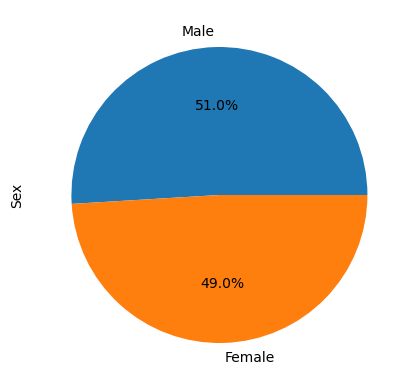

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# use the value stored in gendermix for # of male vs. female mice
gendermix

# create a bar plot, set figure size
plt.figure(figsize = (6,4))

# generate bar plot using length of the instances series
plt.pie(gendermix, labels = gendermix.index, autopct = "%1.1f%%")

# add labels to axis
plt.ylabel("Sex")

# display plot
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the max timepoint associated with each mouse
    # 1st: create a series to show max timepoint for each mouse
    # 2nd: sort values in series by descending value
    # 3rd: create a dataframe based on max_tp series (with sorted values)

max_tp = df_clean.groupby("Mouse ID").max()["Timepoint"]

max_tp = max_tp.sort_values(ascending = False)

df_max_tp = pd.DataFrame({"Max Timepoint": max_tp}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_clean_max = pd.merge(df_clean, df_max_tp, on = "Mouse ID")

In [23]:
df_max_tp

,Mouse ID,Max Timepoint
0,a203,45
1,l897,45
2,m546,45
3,m550,45
4,m601,45
...,...,...
243,d133,0
244,b447,0
245,u153,0
246,v199,0


In [24]:
df_clean_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [25]:
# Put drug regimens into a list for for loop (and later for plot labels)
regimen = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor = []

# use for loop for each of the drug in drugs

for drug in regimen:
    
    # loop through list of drug regimens and keep record where drug regimen matches drug from for loop
    df_for_loop = df_clean_max.loc[df_clean_max["Drug Regimen"] == drug]

    # create subset DataFrame to keep only records related to max time for each mouse
    df_tumor_final = df_for_loop.loc[df_for_loop["Max Timepoint"] == df_for_loop["Timepoint"],:]
    
    # create a series that has the final tumor volume for each drug regimen, final is based on max timepoint
    final_volume = df_tumor_final["Tumor Volume (mm3)"]
    final_tumor.append(final_volume)
    
    # calculate each drug regimen's IQR
    quartiles = final_volume.quantile([.25, .5, .75])
    quartile_1 = quartiles[.25]
    quartile_3 = quartiles[.75]
    iqr = quartile_3 - quartile_1
    
    # display IQR for each drug regimen
    print(f"{drug} regimen recap:")
    print(f" The IQR is {iqr}")
    
    # calculate the bounds (upper and lower) for each drug regimen
    bound_lower = quartile_1 - (1.5*iqr)
    bound_upper = quartile_3 + (1.5*iqr)
    
    # display the bounds for each drug regimen
    print(f" The lower bound is: {bound_lower}")
    print(f" The upper bound is: {bound_upper}")
    
    #check for outliers in each drug regimen
    count_outliers = final_volume.loc[(df_tumor_final["Tumor Volume (mm3)"] >= bound_upper) | 
                                      (df_tumor_final["Tumor Volume (mm3)"] <= bound_lower)].count()
    
    if count_outliers == 0:
        print(f" There are no outliers associated with {drug}'s regimen\n")
        
    else:
        outlier = final_volume.loc[(df_tumor_final["Tumor Volume (mm3)"] >= bound_upper) | 
                                   (df_tumor_final["Tumor Volume (mm3)"] <= bound_lower)]
        print(f" {drug}'s regimen has a potential outlier.  The tumor volume(s) associated with potential outliers: {outlier.values}\n")

Ramicane regimen recap:
 The IQR is 9.098536719999998
 The lower bound is: 17.912664470000003
 The upper bound is: 54.30681135
 There are no outliers associated with Ramicane's regimen

Capomulin regimen recap:
 The IQR is 7.781863460000004
 The lower bound is: 20.70456164999999
 The upper bound is: 51.83201549
 There are no outliers associated with Capomulin's regimen

Infubinol regimen recap:
 The IQR is 11.477135160000003
 The lower bound is: 36.83290494999999
 The upper bound is: 82.74144559000001
 Infubinol's regimen has a potential outlier.  The tumor volume(s) associated with potential outliers: [36.3213458]

Ceftamin regimen recap:
 The IQR is 15.577752179999997
 The lower bound is: 25.355449580000002
 The upper bound is: 87.66645829999999
 There are no outliers associated with Ceftamin's regimen



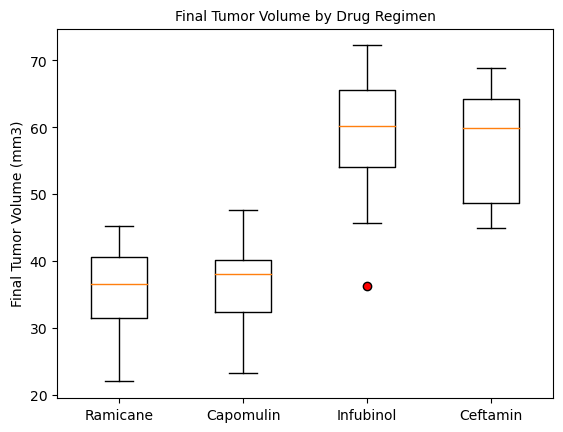

In [26]:
flierprops = dict(marker = 'o', markerfacecolor = 'r', markeredgecolor = 'black' )

# create boxplot -- include x-axis labels, add flierprops parameter to highlight outlier
plt.boxplot(final_tumor, labels = regimen, flierprops = flierprops)

# add label to y-axis and chart title
plt.title("Final Tumor Volume by Drug Regimen", fontsize = 10)
plt.ylabel("Final Tumor Volume (mm3)")

# display boxplot
plt.show()

## Line and Scatter Plots

In [27]:
# find list of mice treated with Capomulin, to identify possible mice to graph in line plot
Capolumin = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
Capolumin

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

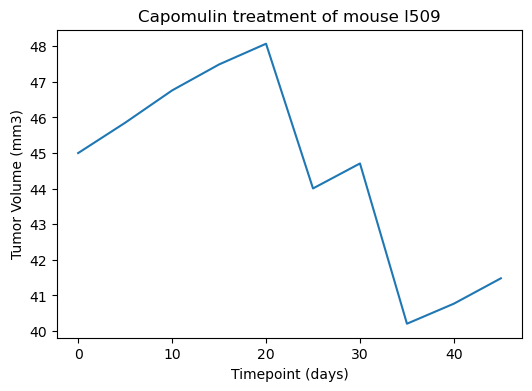

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# filter dataframe for mouse l509, to return series with timepoint and tumor volume size
sample_mouse = df_clean.loc[df_clean["Mouse ID"] == "l509",["Timepoint","Tumor Volume (mm3)"]]

# store values for timepoint and tumor volumn in variables to plot in x and y axis
x = sample_mouse["Timepoint"]
y = sample_mouse["Tumor Volume (mm3)"]

# set figure size, create line plot showing time and tumor volume for the sample mouse
plt.figure(figsize = (6,4))
plt.plot(x,y)

# display chart with axis labels and chart title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

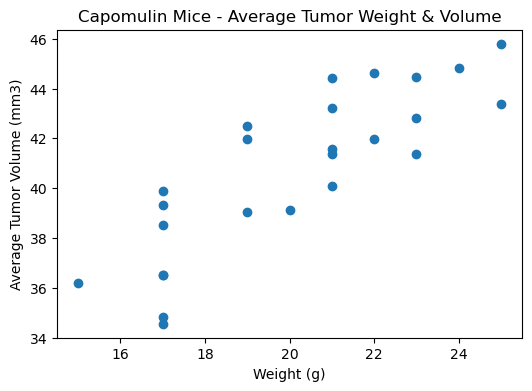

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# create dataframe for mice treated ONLY with Capomulin regimen
df_capomulin = pd.DataFrame(df_clean.loc[df_clean["Drug Regimen"] == "Capomulin",:])

# create a variable to store group by logic for Capomulin DataFrame
each_mouse = df_capomulin.groupby(["Mouse ID"])

# calculate the average tumor volume per mouse, and use a variable to store values
avg_tumor = each_mouse["Tumor Volume (mm3)"].mean()

# calculate the average weight per mouse, and use a variable to store values
avg_weight = each_mouse["Weight (g)"].mean()

# create Data Frame with average tumor, average weight 
df_capomulin_average = pd.DataFrame({"Avg. Tumor": avg_tumor, "Avg. Weight": avg_weight})

# add scatter plot showing average tumor volume and average weight
x = avg_weight
y = avg_tumor

# set figure size, create scatter plot
plt.figure(figsize = (6,4))
plt.scatter(x, y)

# display chart with axis labels and chart title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Mice - Average Tumor Weight & Volume")

plt.show()

## Correlation and Regression

 The corrlation coefficient between weight and average tumor volume on the Capomulin regimen is 0.84.


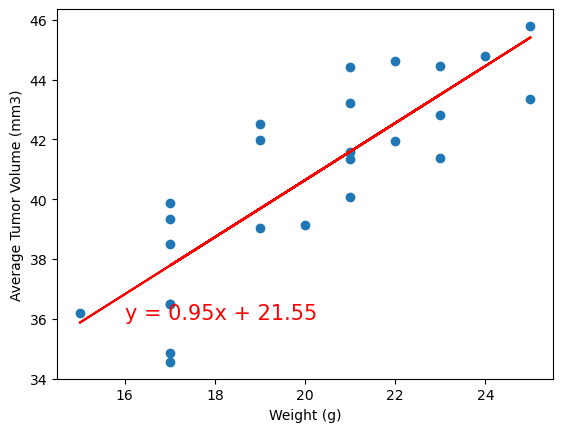

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x,y)

print(f" The corrlation coefficient between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.")

# calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

regression_equation = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)

plt.plot(x, regression_equation, "r-")

plt.annotate(line_eq,(16,36),fontsize=15,color="red")

# display chart with axis labels and chart title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()